In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

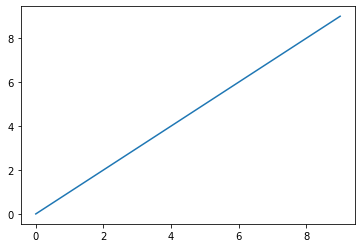

In [3]:
plt.plot(data)

# 图片与子图

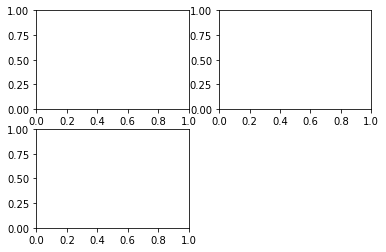

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

当输入绘图命令的时候，matplotlib会在最后一个图片和子图上进行绘制

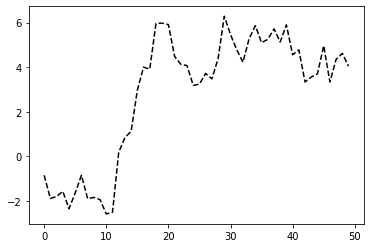

In [12]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [13]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 2.,  1.,  1.,  1.,  0.,  1.,  2., 10.,  6., 10.,  7., 11.,  7.,
        11.,  8.,  8.,  5.,  5.,  2.,  2.]),
 array([-3.42343455, -3.15527374, -2.88711292, -2.6189521 , -2.35079128,
        -2.08263047, -1.81446965, -1.54630883, -1.27814801, -1.0099872 ,
        -0.74182638, -0.47366556, -0.20550474,  0.06265607,  0.33081689,
         0.59897771,  0.86713853,  1.13529935,  1.40346016,  1.67162098,
         1.9397818 ]),
 <BarContainer object of 20 artists>)

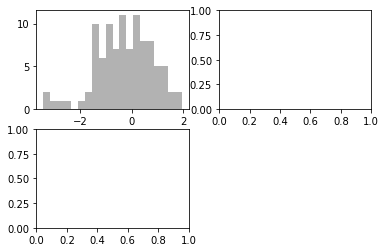

In [14]:
fig

创建一个图片，返回包含了已经生成子图对象的numpy数组

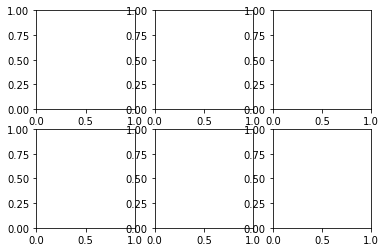

In [15]:
fig, axes = plt.subplots(2, 3)

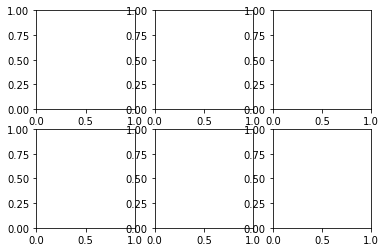

In [16]:
fig

In [17]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

## 调整子图周围的间距

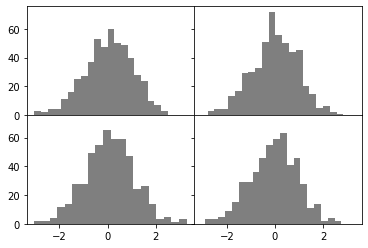

In [31]:
# hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
# bins 它定义了范围内等宽箱的数量,可能是一个图像的分成的份数
# alpha=0.15 调整图像颜色，1为黑色，0为白色
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=20, color='k', alpha=0.5)
#调整子图间的间距
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色，标记和线类型

In [33]:
from numpy.random import randn

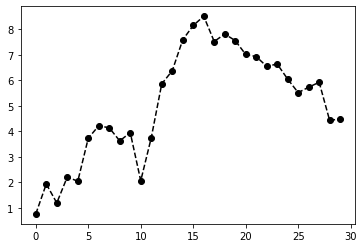

In [34]:
plt.plot(randn(30).cumsum(), 'ko--')

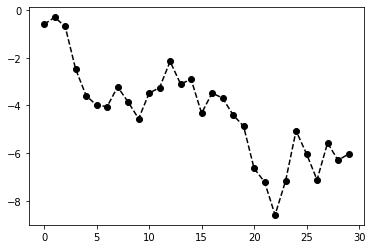

In [37]:
# 上面的代码可以写的更为显式
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [38]:
data = np.random.randn(30).cumsum()

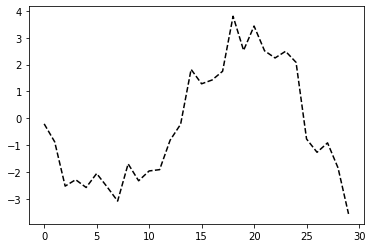

In [39]:
plt.plot(data, 'k--', label='Default')

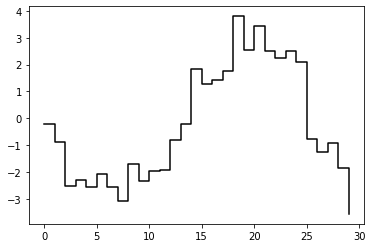

In [42]:
# drawstyle='steps-post'控制线的类型
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

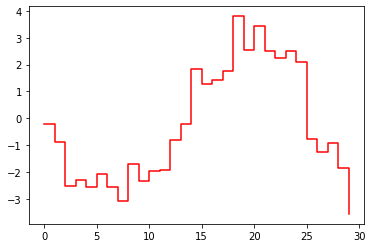

In [44]:
plt.plot(data, 'r-', drawstyle='steps-post')

## 刻度，标签，图例

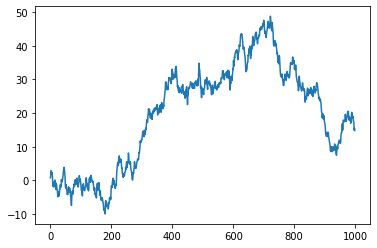

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

设置横轴的刻度

In [47]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

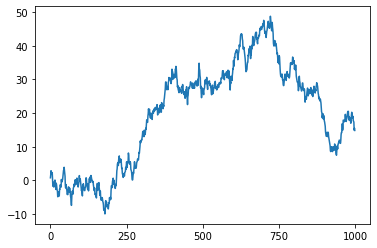

In [48]:
fig

In [49]:
# 为标签赋值
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                           rotation=30, fontsize='small')

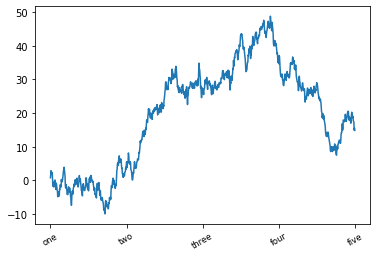

In [50]:
fig

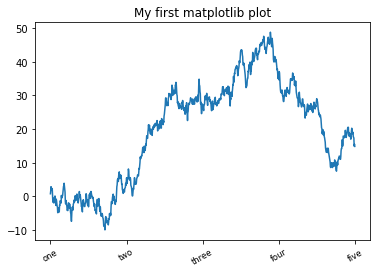

In [52]:
ax.set_title('My first matplotlib plot')
fig

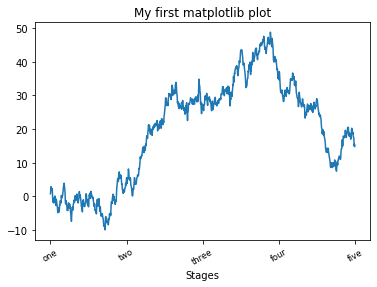

In [53]:
ax.set_xlabel('Stages')
fig

批量设置

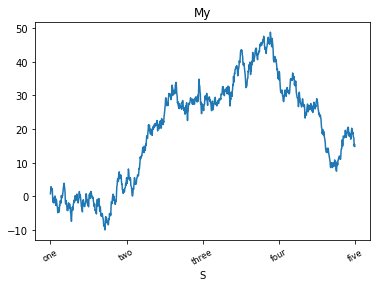

In [54]:
props = {
    'title': 'My',
    'xlabel': 'S'
}
ax.set(**props)
fig

添加图例

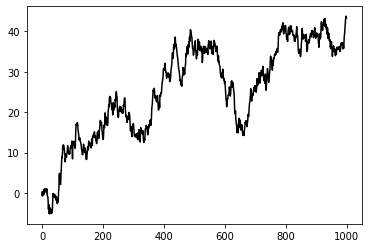

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [63]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [64]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [68]:
ax.legend(loc='best')

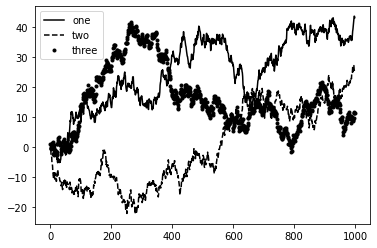

In [69]:
fig

## 注释与子图加工

In [71]:
from datetime import datetime

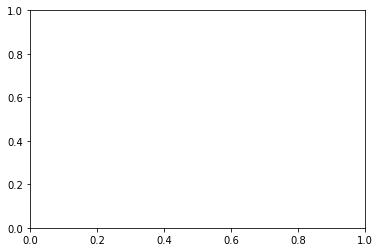

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [97]:
import pandas as pd
data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


In [98]:
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [99]:
spx.plot(ax=ax, style='k-')

<AxesSubplot:>

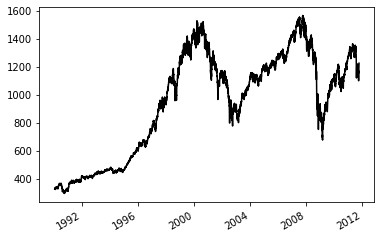

In [100]:
fig

In [101]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak if bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [102]:
# 这个就是设置上面的注释
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

In [103]:
# set_xlim 设置图像的边界
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

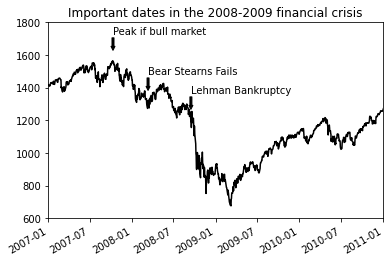

In [104]:
fig

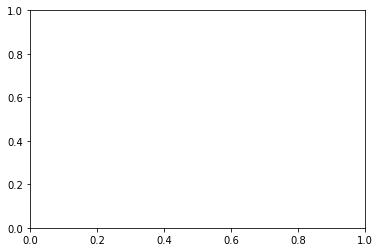

In [105]:
# 添加一些图形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [107]:
# 定义长方形，(0.2, 0.75)表示左下角的位置，0.4, 0.15表示宽和高，alpha=0.3表示图片的颜色深度
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
# 定义圆形，(0.7, 0.2)圆心
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
# 定义三角形 三个点的位置
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

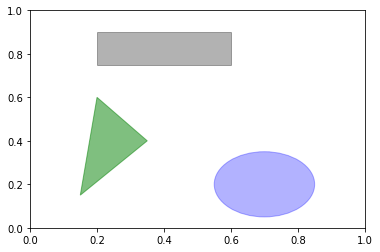

In [108]:
fig

## 将图片保存到文件中

In [110]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

## matplotlib的设置